## Model project

Importing libaries

In [7]:
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt # baseline module
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

## Maximizing profit

We're considering the following profit maximization problem:

$$ \max_{x_1,x_2}  \pi(x_1,x_2) = \max_{x_1,x_2} p f(x_1,x_2) - w x_1 - r x_2$$ <br />    $$s.t.\:\: p = M - .1 Q \land f = \beta x_1^\alpha x_2^{1-\alpha}$$ 

Where $p = M - .1Q$ is the inverse demand function. Where p is price, M is the highest possible price, and Q is demand.

And that supply equals demand in equilibrium

$$Q = f$$

Wage, rate and price are given by w and r. 

We define the parameters as constants, then we move on to define the functions

In [38]:
# parameters:
b = .5 #beta
w = 1.5 #wage
r = 2 #rate
M = 30 #max price
alpha = 0.4 #preference parameter for capital and labor

def profit_func(x1,x2,alpha=.5):
    """
    Profit function: Increases in price, capital and labor. 
    Decreases in wages and rates.
    
    Args: x1: labor, x2: capital.
    
    Returns: Float
    """
    def production_func(x1,x2,alpha=.5):
        return b*x1**alpha*x2**(1-alpha)

    def price_func(x1,x2):
        return M - .1 * production_func(x1,x2,alpha=.5)
    
    return (price_func(x1,x2))*production_func(x1,x2,alpha=.5)-w*x1-r*x2

We're plotting the function to visualize the its response to the inputs.

In [39]:
# function for printing the solution
def print_solution1(x1,x2,profit_func,w,r):
    print("In optimum, we obtain the following:")
    print(f'Labor = {x1:.2f}')
    print(f'Capital = {x2:.2f}')
    print(f'Cost = wx1+rx2 = {x1*w+x2*r:.2f}')
    print(f'Profit = TR-TC = {profit_func(x1,x2,alpha):.2f}')

In [40]:
# a. Profit function to maximize
def value_of_choice(x,alpha,w,r):
    # note: x is a vector
    x1 = x[0]
    x2 = x[1]
    return -profit_func(x1,x2,alpha)

# b. call solver
initial_guess = [10,10]
sol_case2 = optimize.minimize(
    value_of_choice,initial_guess,args=(alpha,w,r))

# d. unpack solution
x1 = sol_case2.x[0]
x2 = sol_case2.x[1]
print_solution1(x1,x2,profit_func, w, r)

In optimum, we obtain the following:
Labor = 266.41
Capital = 199.81
Cost = wx1+rx2 = 799.23
Profit = TR-TC = 1330.77


To analyze the behavior of the function with regards to changes in labour and capital, we illustrate the profit function in a 3-dimensional space.

Text(0.5, 1.0, 'Isoquants')

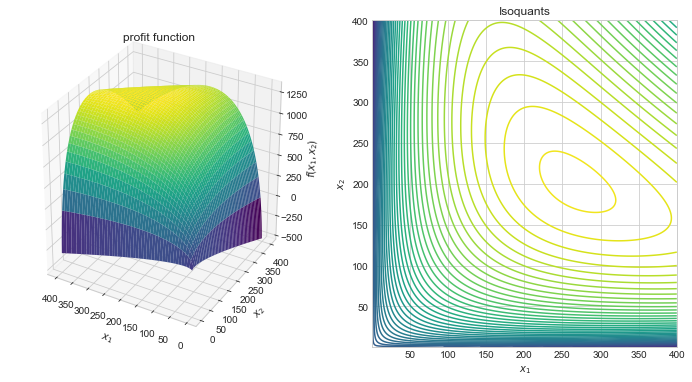

In [41]:
# set sample size
N = 400

# An np array of labour and capital is created
x1_vec = np.linspace(1,400,N)
x2_vec = np.linspace(1,400,N)
# We are creating an empty np array for the profit function we wish to illustrate
f = np.empty((x1_vec.size,x2_vec.size))

# Inserting values for the profits for each x1 and x2
for i1,x1 in enumerate(x1_vec):
    for i2,x2 in enumerate(x2_vec):
        f[i1,i2] = profit_func(x1,x2)
# making the profit function plot interactive for values of x1 and x2 interact(profit_func, x1 = (1,400, 10), x2 =(1,400,10))
# Initiating figure
fig = plt.figure(figsize=(12,6)) # Creating figure
ax = fig.add_subplot(1,2,1, projection='3d') # Adding a 3D subplot
x1,x2 = np.meshgrid(x1_vec,x2_vec,indexing='ij') # Creating the meshgrid for the figure
ax.plot_surface(x1,x2,f,cmap=cm.viridis,edgecolor='') # plotting the profit function

# Formatting the visual presentation
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1,x_2)$')
ax.invert_xaxis()
ax.set_title('profit function')

# To emphasize the profit maximizing amounts, we ad an illustration of isoquants
ax = fig.add_subplot(1,2,2) # Adding subplot

x1,x2 = np.meshgrid(x1_vec,x2_vec,indexing='ij') # Creating the meshgrid for the figure
ax.contour(x1,x2,f,50, cmap=cm.viridis) # plotting the profit function

# Formatting the visual presentation
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Isoquants')
